# Project: Investigate a Dataset (No-show appointments)

## Table of Contents

    * Introduction
    * Data Wrangling
    * Exploratory Data Analysis
    * Conclusions
    
    
## Introduction
    
         Overview
         
         To complete my Data Analysis project I am using No-show appointments dataset.

         This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment.
         It consist of 14 columns such as PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay etc.
         
         Question that can analyised from this data set:
            - how many patients show-up for the appointment
            - appointments day wise
            - appointments from gender
            - appointments from scholarship
            - appointments people no-show
            - appointments from neighbourhood
            - appointments for type of diseases
            - age - diseases - gender
           

## Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading data using Pandas

In [2]:
#Read CSV
noshowdata = pd.read_csv('D:/pythonDataAnalysis/jypterDS/noshowappointments-kagglev2-may-2016.csv')
noshowdata.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Unique Values in Data

In [3]:
#unique values
noshow_unique_values = noshowdata.apply(lambda x: len(x.unique()))
print(noshow_unique_values)

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64


## Finding Missing Values

In [4]:
#check missing columns
noshowdata_missing_values = noshowdata.apply(lambda x: sum(x.isnull()))
print(noshowdata_missing_values)

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [5]:
noshowdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


## change string datatypes to datetimes

In [6]:
noshowdata['ScheduledDay'] = pd.to_datetime(noshowdata['ScheduledDay'])
noshowdata['AppointmentDay'] = pd.to_datetime(noshowdata['AppointmentDay'])
noshowdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null datetime64[ns]
AppointmentDay    110527 non-null datetime64[ns]
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: datetime64[ns](2), float64(1), int64(8), object(3)
memory usage: 11.8+ MB


In [7]:
#Basic statistics for numerical variables
noshowdata.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [8]:
#Remove SMS column
noshowdata_new = noshowdata.drop('SMS_received',axis=1)
noshowdata_new.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,No


## Change object to int to show data in graph / statistical representation


#### Here we will be applying this change on Gender and No-show Column

In [9]:
noshowdata_new['Gender'] = noshowdata_new['Gender'].map({'M':1, 'F':0})
noshowdata_new.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,No-show
0,2.987250e+13,5642903,0,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,No
1,5.589978e+14,5642503,1,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,No
2,4.262962e+12,5642549,0,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,No


In [10]:
#Change object to int to show data in graph / statistical representation
noshowdata_new['No-show'] = noshowdata_new['No-show'].map({'Yes':1, 'No':0})
noshowdata_new.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,No-show
0,2.987250e+13,5642903,0,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0
1,5.589978e+14,5642503,1,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0
2,4.262962e+12,5642549,0,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0


In [11]:
# Replace column names / Correct spelling of column names
noshowdata_new.rename(columns={'PatientId':'Patient_ID','AppointmentID':'Appointment_ID','Hipertension':'Hypertension','Handcap':'Handicap'},inplace=True)
noshowdata_new.head(3)

,Patient_ID,Appointment_ID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,No-show
0,2.987250e+13,5642903,0,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0
1,5.589978e+14,5642503,1,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0
2,4.262962e+12,5642549,0,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0





# Exploratory Data Analysis
    We will now compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section.

### Research Question 1: Number of Appointments per patient

In [49]:
patients_appointments_cnt = noshowdata_new['Patient_ID'].value_counts()
print(patients_appointments_cnt)

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
2.584244e+11    62
7.579746e+13    62
8.713749e+14    62
6.264199e+12    62
6.684488e+13    57
8.722785e+11    55
8.923969e+13    54
8.435224e+09    51
8.534397e+14    50
1.447997e+13    46
6.543360e+13    46
8.189452e+13    42
9.452745e+12    42
1.882323e+14    40
9.496197e+12    38
2.271580e+12    38
1.336493e+13    37
1.484143e+12    35
8.883500e+13    34
9.861628e+14    34
7.124589e+14    33
4.167557e+14    30
6.128878e+12    30
8.121397e+13    29
8.634164e+12    24
3.699499e+13    23
                ..
6.375629e+12     1
9.369127e+12     1
5.375556e+14     1
1.662184e+11     1
7.234615e+13     1
9.649990e+12     1
6.912783e+10     1
1.954265e+13     1
2.736377e+10     1
5.532694e+11     1
7.149583e+12     1
8.676752e+13     1
7.838359e+13     1
5.962625e+11     1
4.919862e+13     1
3.477350e+14     1
1.626595e+13     1
7.794917e+12     1
1.161950e+13     1
5.615364e+14     1
4.355592e+11     1
1.321328e+12

From above data we come to know that highest number of appointments from a patient is 88.
Lets describe it in statistical form

In [50]:
patients_appointments_cnt.describe()

count    62299.000000
mean         1.774138
std          1.770324
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         88.000000
Name: Patient_ID, dtype: float64

In reference to above observation, maximum patients have only one appointment, but there are some patients with more than one appointment.

### Question 2: Gender wise no-show 

In [67]:
# Total nnumber of gender
gender_cnt = noshowdata_new['Gender'].count()
print('Total number of Gender: ',gender_cnt)

Total number of Gender:  110527


In [82]:
# Total number of males and females
genderwise_cnt = noshowdata_new['Gender'].value_counts()
male = genderwise_cnt[1]
female = genderwise_cnt[0]
print('Male: ',male)
print('Female: ',female)

Male:  38687
Female:  71840


    
    Total number of Gender: 110527
    Total number of Male: 38687
    Total number of Female: 71840
    
    Now Let's filter it to no-show. To achieve that we will be using pivot table
        Gender : Male = 1 & Female = 0
        No-show: Yes = 1 & No = 0
    
1) Total number of gender that show and not-show for the appointments

In [84]:
#Pivot the dataset
numberOfGenderNoshow = noshowdata_new.pivot_table(values=['No-show'],index=['Gender'],aggfunc={np.mean,np.sum,np.median})
print(numberOfGenderNoshow)

         No-show                
            mean median      sum
Gender                          
0       0.203146    0.0  14594.0
1       0.199679    0.0   7725.0


    From total 110527, 7725 show-up for the appointments and 30962 fails to show-up
    
    Now we will further figureout male and female who showed-up / not-show for appointments

2) Total number of show and not-show for the appointments genderwise differentiation

In [87]:
numberOfGenderwiseNoshow = noshowdata_new.groupby(['Gender','No-show'])['No-show'].size()
print(numberOfGenderwiseNoshow)

Gender  No-show
0       0          57246
        1          14594
1       0          30962
        1           7725
Name: No-show, dtype: int64


    Gender : Male = 1 & Female = 0
    No-show: Yes = 1 & No = 0
    
    Number of show-ups
    Male:  7725
    Female: 14594
    
    Number of No-show
    Male: 30962
    Female: 57246

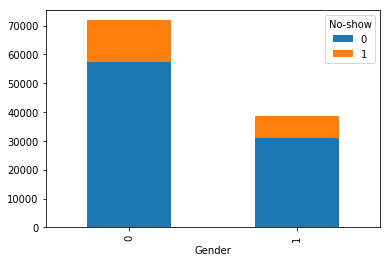

In [91]:
numberOfGenderwiseNoshow.unstack().plot(kind='bar',stacked=True)
plt.show()

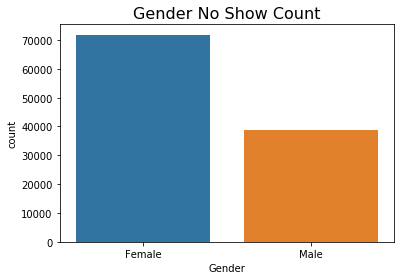

In [88]:
ax = sns.countplot(noshowdata_new.Gender.replace({0:'Female',1:'Male'}));
ax.set_title('Gender No Show Count',fontsize=16);

## No-show overview on all aspects

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CA35518>,
      dtype=object)

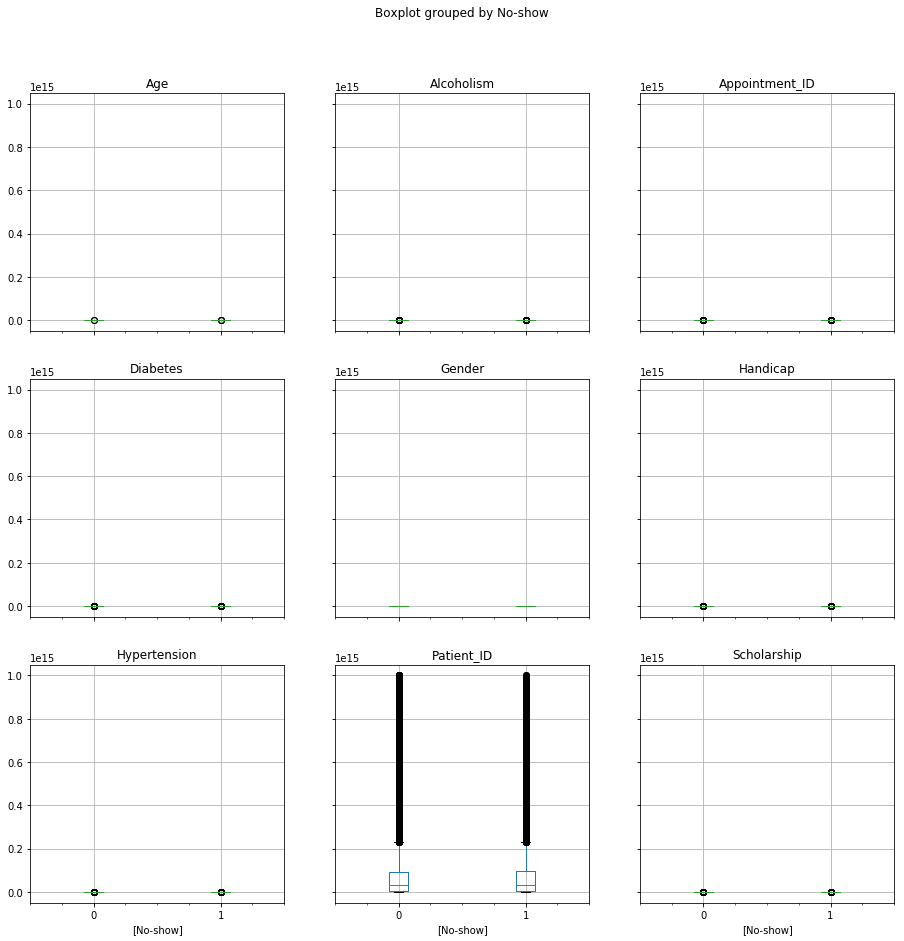

In [92]:
# boxplot on each feature split out by No-show
noshowdata_new.boxplot(by="No-show",figsize=(15,15))

### Research Question 3: Neighbourhood effects the show up

In [102]:
totalNeighbourhoodCnt = noshowdata_new['Neighbourhood'].value_counts().count()
print('Total number of neighbourhoods: ',totalNeighbourhoodCnt)

Total number of neighbourhoods:  81


Now we will check these neighbourhoods with number of appointments.

In [106]:
neighbourhood_appointments_cnt = noshowdata_new['Neighbourhood'].value_counts()
print('Neighbourhood with number of appointments: \n',neighbourhood_appointments_cnt)

Neighbourhood with number of appointments: 
 JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
CENTRO                         3334
TABUAZEIRO                     3132
SANTA MARTHA                   3131
JESUS DE NAZARETH              2853
BONFIM                         2773
SANTO ANTÔNIO                  2746
SANTO ANDRÉ                    2571
CARATOÍRA                      2565
JABOUR                         2509
SÃO PEDRO                      2448
ILHA DO PRÍNCIPE               2266
NOVA PALESTINA                 2264
ANDORINHAS                     2262
DA PENHA                       2217
ROMÃO                          2215
GURIGICA                       2018
SÃO JOSÉ                       1977
BELA VISTA                     1907
MARUÍPE                        1902
FORTE SÃO JOÃO                 1889
ILHA DE SANTA MARIA            1885
SÃO CRISTÓVÃO      

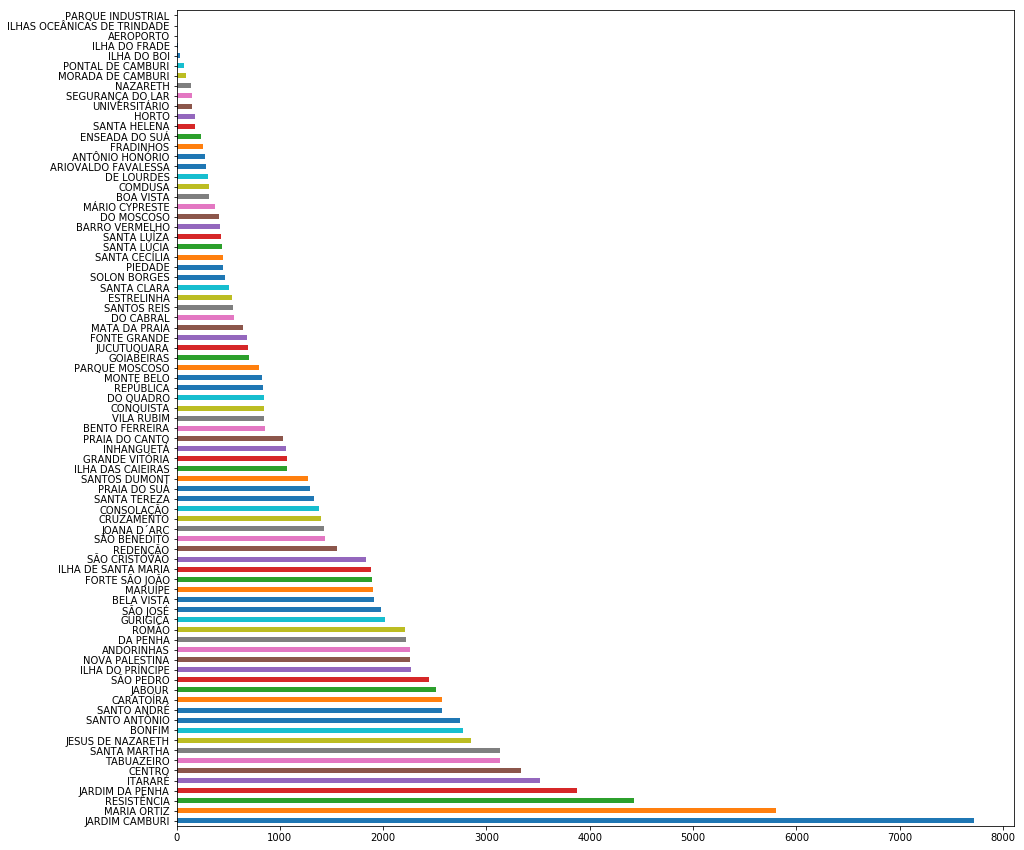

In [107]:
neighbourhood_appointments_cnt.plot(kind='barh',figsize=(15,15))
plt.show()

C:\Users\divya.baria\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


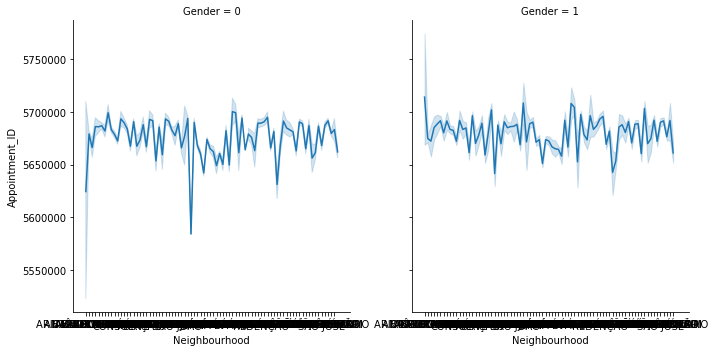

In [115]:
# Representation of neighbourhood with Appointments, here we come to know which neighbourhood has highest appointments
sns.relplot(x="Neighbourhood", y="Appointment_ID", kind='line',col="Gender",data=noshowdata_new);
plt.show()

In [16]:
# add column for Weekday
weekDays = ("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")
appDays = []
for x in noshowdata_new['AppointmentDay']:
    wd = weekDays[x.weekday()]
    #print(wd)
    appDays.append(wd)
#print(appDays)    
    #print(noshowdata_new['Weekdays'])
noshowdata_new['Weekdays'] = appDays   
noshowdata_new.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,No-show,Weekdays
0,2.987250e+13,5642903,0,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,Friday
1,5.589978e+14,5642503,1,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,Friday
2,4.262962e+12,5642549,0,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,Friday


C:\Users\divya.baria\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


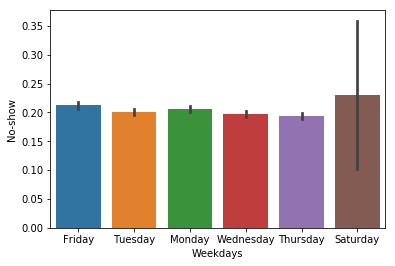

In [17]:
sns.barplot(y='No-show', x='Weekdays', data=noshowdata_new)
plt.show()

C:\Users\divya.baria\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


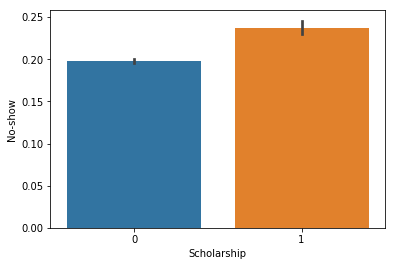

In [18]:
sns.barplot(y='No-show', x='Scholarship', data=noshowdata_new)
plt.show()

C:\Users\divya.baria\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


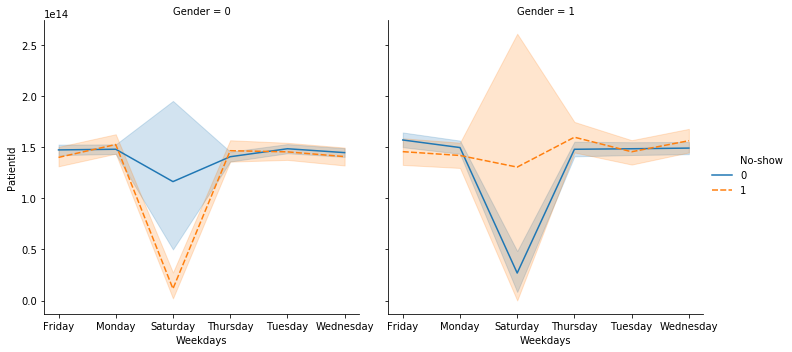

In [19]:
sns.relplot(x="Weekdays", y="PatientId", hue="No-show",style='No-show',col='Gender',kind='line',data=noshowdata_new);
plt.show()

In [20]:
#Pivot the dataset
noshow_pivottable1 = noshowdata_new.pivot_table(values=['Hypertension','Diabetes','Alcoholism','Handicap'],index=['No-show','Gender'],aggfunc=np.sum)
print(noshow_pivottable1)

                Alcoholism  Diabetes  Handicap  Hypertension
No-show Gender                                              
0       0              915      4589      1133         12682
        1             1768      1924       873          5347
1       0              308      1017       271          2657
        1              369       413       182          1115


In [47]:
#Pivot the dataset
noshow_pivottabletest = noshowdata_new.pivot_table(values=['Hypertension','Diabetes','Alcoholism','Handicap'],index=['PatientId'],aggfunc=np.sum)
print(noshow_pivottabletest)

              Alcoholism  Diabetes  Handicap  Hypertension
PatientId                                                 
3.921784e+04           0         0         0             0
4.374176e+04           0         1         0             0
9.377953e+04           0         0         0             0
1.417242e+05           0         0         0             0
5.376153e+05           0         0         0             0
5.628261e+06           0         0         0             0
1.183186e+07           0         0         0             0
2.263866e+07           0         0         0             0
5.216894e+07           0         0         0             0
5.422400e+07           0         0         0             0
6.143378e+07           0         0         0             0
6.249793e+07           0         0         0             0
6.485121e+07           0         0         0             0
7.838548e+07           0         0         0             0
7.922850e+07           0         0         0            

In [21]:
#Pivot the dataset
noshow_pivottable = noshowdata_new.pivot_table(values=['Hypertension','Diabetes','Alcoholism','Handicap'],index=['No-show','Gender','Weekdays','Scholarship'],aggfunc=np.sum)
print(noshow_pivottable)

                                      Alcoholism  Diabetes  Handicap  \
No-show Gender Weekdays  Scholarship                                   
0       0      Friday    0                   109       764       182   
                         1                    57        51        26   
               Monday    0                   111       753       184   
                         1                    54       100        27   
               Saturday  0                     1         2         0   
                         1                     0         0         0   
               Thursday  0                    96       660       183   
                         1                    50        73        11   
               Tuesday   0                   142      1041       246   
                         1                    61        84        24   
               Wednesday 0                   149       965       220   
                         1                    85        96      

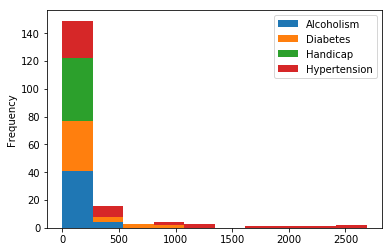

In [45]:
noshow_pivottable.plot(kind='hist',stacked=True)
plt.show()

In [23]:
#Pivot the dataset
noshow_pivottable2 = noshowdata_new.pivot_table(values=['Hypertension','Diabetes','Alcoholism','Handicap','Scholarship'],index=['No-show','Gender','Weekdays'],aggfunc=np.sum)
print(noshow_pivottable2)

                          Alcoholism  Diabetes  Handicap  Hypertension  \
No-show Gender Weekdays                                                  
0       0      Friday            166       815       208          2139   
               Monday            165       853       211          2488   
               Saturday            1         2         0             9   
               Thursday          146       733       194          2080   
               Tuesday           203      1125       270          2985   
               Wednesday         234      1061       250          2981   
        1      Friday            326       361       170           927   
               Monday            379       390       172          1109   
               Saturday            1         3         1             6   
               Thursday          271       268       144           827   
               Tuesday           371       455       198          1264   
               Wednesday         420  

In [24]:
#Pivot the dataset
noshow_pivottable4 = noshowdata_new.pivot_table(values=['Gender','AppointmentID'],index=['No-show'],aggfunc={'Gender':np.sum,'AppointmentID':[min,max,np.mean,np.sum]})
print(noshow_pivottable4)

        AppointmentID                                        Gender
                  max          mean        min           sum    sum
No-show                                                            
0           5790484.0  5.681137e+06  5030230.0  5.011217e+11  30962
1           5789986.0  5.652259e+06  5122866.0  1.261528e+11   7725


In [25]:
#Pivot the dataset
noshow_pivottable2 = noshowdata_new.pivot_table(values=['Scholarship'],index=['No-show','Gender'],aggfunc=np.sum)
print(noshow_pivottable2)

                Scholarship
No-show Gender             
0       0              6747
        1              1536
1       0              2106
        1               472


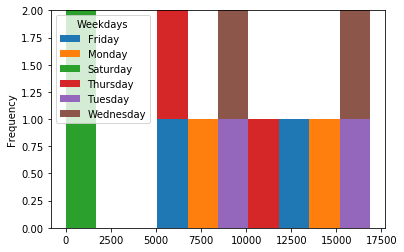

In [27]:
noshowdata_new.groupby(['Gender','Weekdays'])['No-show'].size().unstack().plot(kind='hist',stacked=True)
plt.show()

In [29]:
age_unique = noshowdata_new['Age'].unique()
age_unique.sort()
print(age_unique)

[ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 102 115]


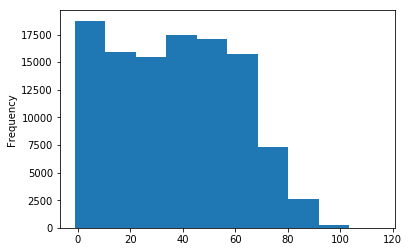

In [30]:
# Distribution of 'Age'
plt.figure();
age_hist = noshowdata_new['Age'].plot.hist(bins=10)

In [31]:
noshowdata_new['Age'].value_counts().sort_index()

-1         1
 0      3539
 1      2273
 2      1618
 3      1513
 4      1299
 5      1489
 6      1521
 7      1427
 8      1424
 9      1372
 10     1274
 11     1195
 12     1092
 13     1103
 14     1118
 15     1211
 16     1402
 17     1509
 18     1487
 19     1545
 20     1437
 21     1452
 22     1376
 23     1349
 24     1242
 25     1332
 26     1283
 27     1377
 28     1448
        ... 
 73      725
 74      602
 75      544
 76      571
 77      527
 78      541
 79      390
 80      511
 81      434
 82      392
 83      280
 84      311
 85      275
 86      260
 87      184
 88      126
 89      173
 90      109
 91       66
 92       86
 93       53
 94       33
 95       24
 96       17
 97       11
 98        6
 99        1
 100       4
 102       2
 115       5
Name: Age, Length: 104, dtype: int64

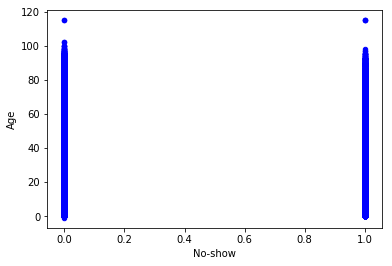

In [32]:
# a scatter plot comparing age and no-show
noshowdata_new.plot(kind='scatter',x='No-show',y='Age',color='blue')
plt.show()

In [33]:
noshwgrpby = noshowdata_new.groupby(['Age','No-show'])
noshwgrpbypid = noshowdata_new.groupby(['Age','No-show'])['PatientId'].size().unstack()
print(noshwgrpbypid)

No-show       0      1
Age                   
-1          1.0    NaN
 0       2900.0  639.0
 1       1858.0  415.0
 2       1366.0  252.0
 3       1236.0  277.0
 4       1017.0  282.0
 5       1169.0  320.0
 6       1205.0  316.0
 7       1126.0  301.0
 8       1106.0  318.0
 9       1008.0  364.0
 10       970.0  304.0
 11       948.0  247.0
 12       820.0  272.0
 13       800.0  303.0
 14       802.0  316.0
 15       889.0  322.0
 16      1049.0  353.0
 17      1113.0  396.0
 18      1137.0  350.0
 19      1151.0  394.0
 20      1082.0  355.0
 21      1097.0  355.0
 22      1025.0  351.0
 23      1006.0  343.0
 24       921.0  321.0
 25       980.0  352.0
 26       971.0  312.0
 27      1048.0  329.0
 28      1116.0  332.0
...         ...    ...
 73       629.0   96.0
 74       513.0   89.0
 75       463.0   81.0
 76       480.0   91.0
 77       448.0   79.0
 78       452.0   89.0
 79       329.0   61.0
 80       430.0   81.0
 81       371.0   63.0
 82       326.0   66.0
 83       2

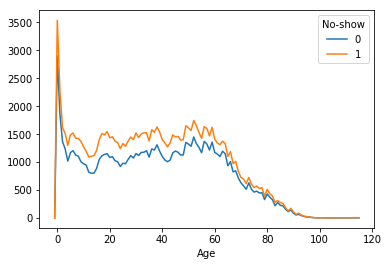

In [34]:
noshowdata_new.groupby(['Age','No-show'])['PatientId'].size().unstack().plot(kind='line',stacked=True)
plt.show()

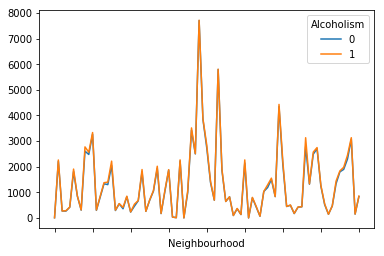

In [35]:
# Distribution of 'Neighbourhood', Alcoholism type
noshowdata_new.groupby(['Neighbourhood','Alcoholism'])['Age'].size().unstack().plot(kind='line',stacked=True)
plt.show()

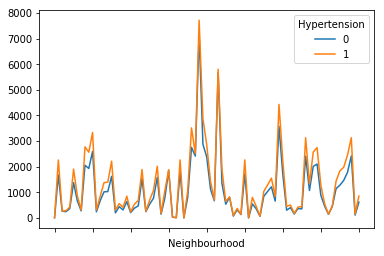

In [36]:
# Distribution of 'Neighbourhood', Hypertension type
noshowdata_new.groupby(['Neighbourhood','Hypertension'])['Age'].size().unstack().plot(kind='line',stacked=True)
plt.show()

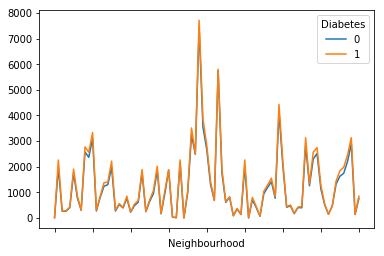

In [37]:
# Distribution of 'Neighbourhood', Diabetes type
noshowdata_new.groupby(['Neighbourhood','Diabetes'])['Age'].size().unstack().plot(kind='line',stacked=True)
plt.show()

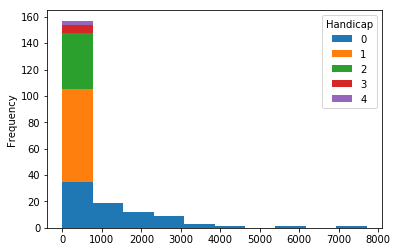

In [38]:
# Distribution of 'Neighbourhood', Diabetes type
noshowdata_new.groupby(['Neighbourhood','Handicap'])['Age'].size().unstack().plot(kind='hist',stacked=True)
plt.show()

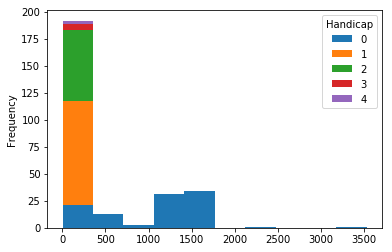

In [39]:
# Distribution of 'Neighbourhood', Handcap type
noshowdata_new.groupby(['Age','Handicap'])['Gender'].size().unstack().plot(kind='hist',stacked=True)
plt.show()

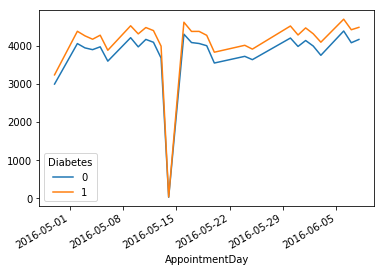

In [40]:
noshowdata_new.groupby(['AppointmentDay','Diabetes'])['Age'].size().unstack().plot(kind='line',stacked=True)
plt.show()

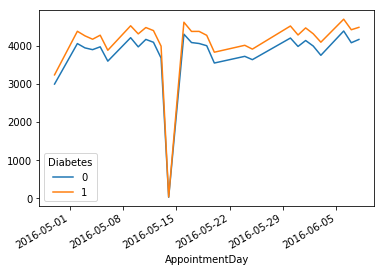

In [41]:
noshowdata_new.groupby(['AppointmentDay','Diabetes'])['Age'].size().unstack().plot(kind='line',stacked=True)
plt.show()

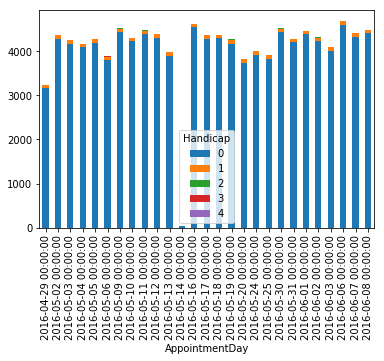

In [42]:
noshowdata_new.groupby(['AppointmentDay','Handicap'])['Age'].size().unstack().plot(kind='bar',stacked=True)
plt.show()